# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
print(iris.target_names) # 分3群為最佳
print(iris.feature_names) # 取其中3個特徵畫3D圖

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
estimators = [
    ('k_means_8', KMeans(n_clusters=8)),
    ('k_means_3', KMeans(n_clusters=3)),
    ('k_means_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))
]

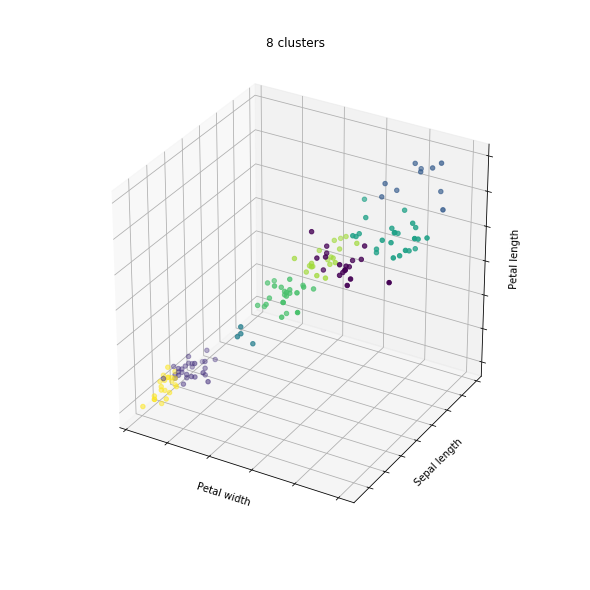

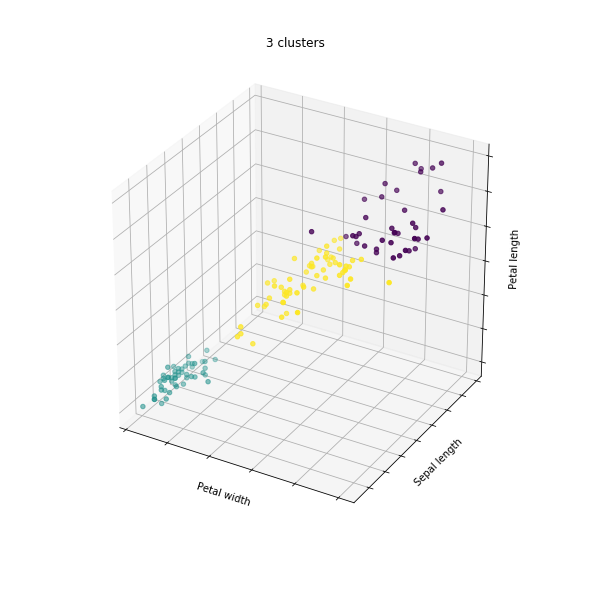

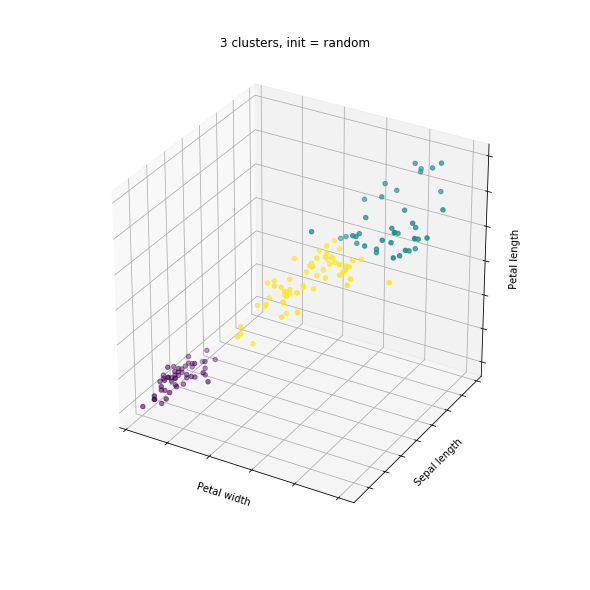

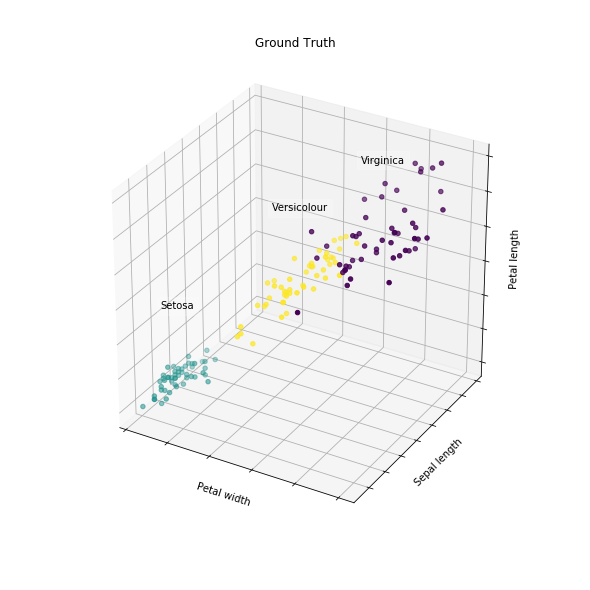

In [5]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, init = random']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 8))
    ax = Axes3D(fig)
    
    est.fit(x)
    
    labels = est.labels_

    ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=labels.astype(np.float)) # 參數c 每一群的顏色更鮮明

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

    
# -------------------------------------------------------------------------------
    
# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 8))
ax = Axes3D(fig)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(x[y == label, 3].mean(), x[y == label, 0].mean(), x[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=np.choose(y, [1, 2, 0]).astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()